# Polynomial Regression for Hospitalized


# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [3]:
Day = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
6     15     10032.0
      16     11086.0
      17     13108.0
      18     13829.0
      19     14740.0

[106 rows x 1 columns]

In [4]:
x = np.arange(len(Day))
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [5]:
y = Day.values
y

array([[5.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       [4.0000e+00],
       [4.0000e+00],
       [8.0000e+00],
       [4.0000e+00],
       [6.0000e+00],
       [1.1000e+01],
       [8.0000e+00],
       [1.2000e+01],
       [1.4000e+01],
       [2.2000e+01],
       [2.1000e+01],
       [5.2000e+01],
       [6.7000e+01],
       [5.9000e+01],
       [8.2000e+01],
       [6.3000e+01],
       [7.5000e+01],
       [5.8000e+01],
       [1.4000e+02],
       [1.2300e+02],
       [1.0600e+02],
       [1.7800e+02],
       [3.0600e+02],
       [4.2300e+02],
       [4.8500e+02],
       [5.5600e+02],
       [5.7600e+02],
       [6.0600e+02],
       [4.8500e+02],
       [5.7000e+02],
       [5.6300e+02],
       [8.1200e+02],
       [8.7000e+02],
       [8.5300e+02],
       [7.5800e+02],
       [1.2430e+03],
       [1.0310e+03],
       [8.8400e+02],
       [1.0610e+03],
       [9.2200e+02],
       [1.3700e+03],
       [1.5790e+03],
       [1.2390e+03],
       [1.5370e+03],
       [1.292

In [6]:
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree=5)
X = Poly.fit_transform(x.reshape(-1,1))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1.68070000e+04],
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 

In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.000000e+00
1,1.0,1.0,1.0,1.0,1.0,1.000000e+00
2,1.0,2.0,4.0,8.0,16.0,3.200000e+01
3,1.0,3.0,9.0,27.0,81.0,2.430000e+02
4,1.0,4.0,16.0,64.0,256.0,1.024000e+03
...,...,...,...,...,...,...
101,1.0,101.0,10201.0,1030301.0,104060401.0,1.051010e+10
102,1.0,102.0,10404.0,1061208.0,108243216.0,1.104081e+10
103,1.0,103.0,10609.0,1092727.0,112550881.0,1.159274e+10
104,1.0,104.0,10816.0,1124864.0,116985856.0,1.216653e+10


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
reg.coef_

array([[ 0.00000000e+00,  4.29742727e+00,  3.52034106e-01,
        -5.37306369e-03,  3.07831191e-04, -1.74043924e-06]])

In [10]:
reg.intercept_

array([-41.15002974])

In [11]:
Yp = reg.predict(X)
Yp

array([[-4.11500297e+01],
       [-3.65056353e+01],
       [-3.11851537e+01],
       [-2.52100023e+01],
       [-1.85946285e+01],
       [-1.13467181e+01],
       [-3.46740448e+00],
       [ 5.04852264e+00],
       [ 1.42124085e+01],
       [ 2.40415241e+01],
       [ 3.45588579e+01],
       [ 4.57929063e+01],
       [ 5.77774654e+01],
       [ 7.05514216e+01],
       [ 8.41585432e+01],
       [ 9.86472713e+01],
       [ 1.14070511e+02],
       [ 1.30485423e+02],
       [ 1.47953213e+02],
       [ 1.66538926e+02],
       [ 1.86311234e+02],
       [ 2.07342229e+02],
       [ 2.29707216e+02],
       [ 2.53484498e+02],
       [ 2.78755175e+02],
       [ 3.05602930e+02],
       [ 3.34113821e+02],
       [ 3.64376073e+02],
       [ 3.96479868e+02],
       [ 4.30517138e+02],
       [ 4.66581355e+02],
       [ 5.04767323e+02],
       [ 5.45170965e+02],
       [ 5.87889122e+02],
       [ 6.33019336e+02],
       [ 6.80659648e+02],
       [ 7.30908382e+02],
       [ 7.83863944e+02],
       [ 8.3

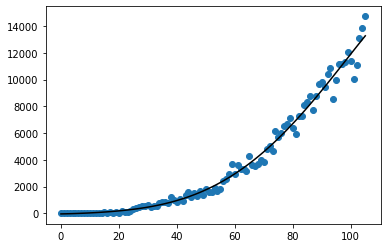

In [12]:
plt.scatter(x,y)
plt.plot(x,Yp,color='k')
plt.show()

In [13]:
reg.score(X,y)*100

98.58763596566682

In [14]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [15]:
reg.predict(Poly.transform([[107]]))

array([[13806.70809979]])

# Polynomial Regression for Deceased

In [16]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [17]:
Day = data[data['Current Status'] == 'Deceased'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     12         2.0
      13         1.0
      19         1.0
      21         3.0
      22         2.0
...              ...
6     15       396.0
      16      2004.0
      17       341.0
      18       343.0
      19       364.0

[80 rows x 1 columns]

In [18]:
x = np.arange(len(Day))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [19]:
y = Day.values
y

array([[2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [3.000e+00],
       [2.000e+00],
       [3.000e+00],
       [1.000e+00],
       [1.000e+00],
       [2.000e+00],
       [2.000e+00],
       [2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [4.000e+00],
       [3.000e+00],
       [3.000e+00],
       [3.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [5.800e+01],
       [6.900e+01],
       [7.100e+01],
       [7.500e+01],
       [7.700e+01],
       [9.200e+01],
       [1.400e+02],
       [1.030e+02],
       [1.280e+02],
       [9.100e+01],
       [1.040e+02],
       [9.700e+01],
       [1.160e+02],
       [1.120e+02],
       [8.100e+01],
       [1.200e+02],
       [1.370e+02],
       [9.700e+01],
       [1.040e+02],
       [1.200e+02],
       [1.520e+02],
       [1.310e+02],
       [1.460e+02],
       [1.340e+02],


In [20]:
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree=5)
X = Poly.fit_transform(x.reshape(-1,1))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1.68070000e+04],
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 

In [21]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.000000e+00
1,1.0,1.0,1.0,1.0,1.0,1.000000e+00
2,1.0,2.0,4.0,8.0,16.0,3.200000e+01
3,1.0,3.0,9.0,27.0,81.0,2.430000e+02
4,1.0,4.0,16.0,64.0,256.0,1.024000e+03
...,...,...,...,...,...,...
75,1.0,75.0,5625.0,421875.0,31640625.0,2.373047e+09
76,1.0,76.0,5776.0,438976.0,33362176.0,2.535525e+09
77,1.0,77.0,5929.0,456533.0,35153041.0,2.706784e+09
78,1.0,78.0,6084.0,474552.0,37015056.0,2.887174e+09


In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [23]:
reg.coef_

array([[ 0.00000000e+00, -1.50278908e+01,  1.30318746e+00,
        -3.68015576e-02,  4.35368311e-04, -1.67388337e-06]])

In [24]:
Yp = reg.predict(X)
Yp

array([[ 3.48394396e+01],
       [ 2.10783683e+01],
       [ 9.70890759e+00],
       [ 5.25670183e-01],
       [-6.66668395e+00],
       [-1.20536486e+01],
       [-1.58110723e+01],
       [-1.81053589e+01],
       [-1.90936687e+01],
       [-1.89241193e+01],
       [-1.77359861e+01],
       [-1.56599039e+01],
       [-1.28180669e+01],
       [-9.32443032e+00],
       [-5.28491064e+00],
       [-7.97586954e-01],
       [ 4.04709843e+00],
       [ 9.16613903e+00],
       [ 1.44837634e+01],
       [ 1.99312341e+01],
       [ 2.54466470e+01],
       [ 3.09747305e+01],
       [ 3.64666442e+01],
       [ 4.18797787e+01],
       [ 4.71775542e+01],
       [ 5.23292198e+01],
       [ 5.73096526e+01],
       [ 6.20991572e+01],
       [ 6.66832643e+01],
       [ 7.10525299e+01],
       [ 7.52023349e+01],
       [ 7.91326837e+01],
       [ 8.28480037e+01],
       [ 8.63569443e+01],
       [ 8.96721759e+01],
       [ 9.28101893e+01],
       [ 9.57910945e+01],
       [ 9.86384202e+01],
       [ 1.0

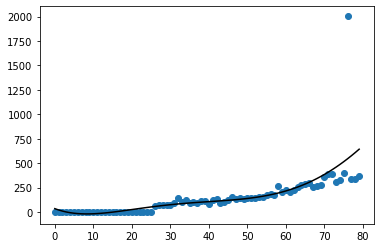

In [25]:
plt.scatter(x,y)
plt.plot(x,Yp,color='k')
plt.show()

In [26]:
reg.score(X,y)*100

46.93005876654437

In [27]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [28]:
reg.predict(Poly.transform([[107]]))

array([[1854.38209924]])